<a href="https://colab.research.google.com/github/vimalthomas/dslabs_VJ/blob/master/computing_gradient_decent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Load and Prepare Data
uploaded = files.upload()
file_name = 'KCSmall2.csv'
data = pd.read_csv(file_name, header=None)

Saving KCSmall2.csv to KCSmall2 (1).csv


In [2]:
display(data)

,0,1
0,1.18,22.19
1,2.57,53.80
2,0.77,18.00
3,1.96,60.40
4,1.68,51.00
...,...,...
95,3.30,90.50
96,1.96,24.75
97,1.16,19.90
98,1.81,31.40


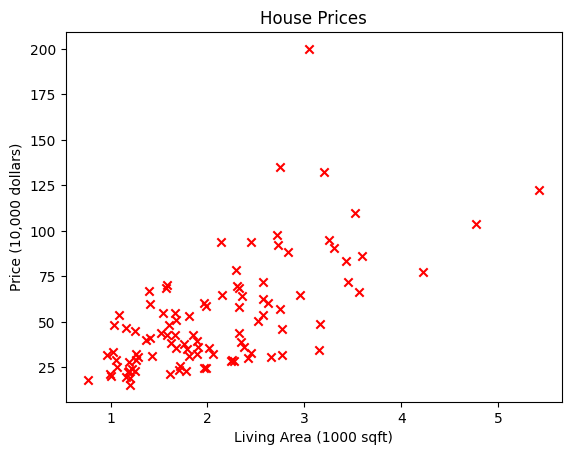

In [3]:
x = data[0].values
y = data[1].values

# Add a column of ones to x for the intercept term (theta_0)
x = np.vstack((np.ones(len(x)), x)).T

# Plotting the data points
plt.scatter(data[0], data[1], marker='x', color='r')
plt.xlabel('Living Area (1000 sqft)')
plt.ylabel('Price (10,000 dollars)')
plt.title('House Prices')
plt.show()

In [4]:
def compute_cost(x, y, theta):
    m = len(y)
    h = x.dot(theta)
    cost = (1 / (2 * m)) * np.sum((h - y) ** 2)
    return cost

# Print the cost function value for specific theta values
theta1 = np.array([0, 0])
theta2 = np.array([-1, 20])
print("Cost for theta = (0,0):", compute_cost(x, y, theta1))
print("Cost for theta = (-1,20):", compute_cost(x, y, theta2))

Cost for theta = (0,0): 1806.5505763862504
Cost for theta = (-1,20): 330.09850138625


In [5]:
def gradient_descent(x, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        h = x.dot(theta)
        gradient = (1 / m) * x.T.dot(h - y)
        theta = theta - learning_rate * gradient
        cost_history[i] = compute_cost(x, y, theta)

    return theta, cost_history

In [6]:
# Define learning rates and number of iterations
learning_rates = [0.01, 0.1, 0.2, 0.4]
iterations = 15

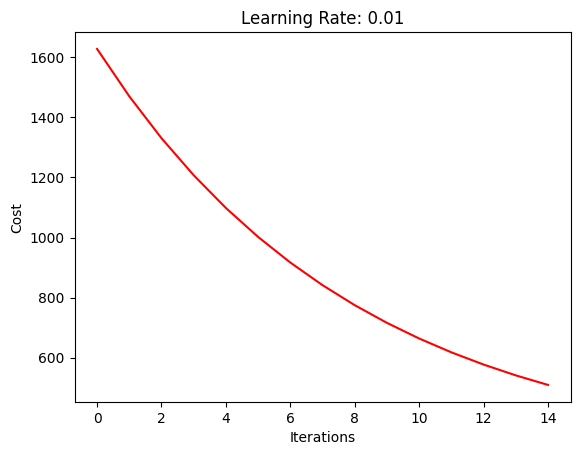

Learning Rate: 0.01
Final theta: [ 5.21190506 12.66306837]
Final cost: 509.12859087445696
Prediction for x=3.5: 49.53264434569726
Prediction for x=7.0: 93.85338362912675




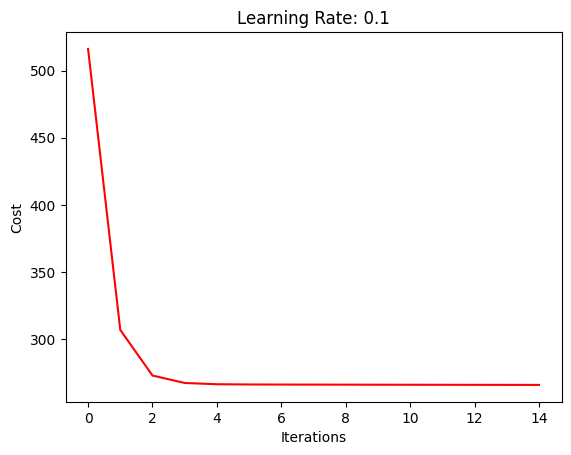

Learning Rate: 0.1
Final theta: [ 7.95393926 21.28921848]
Final cost: 265.9241360913752
Prediction for x=3.5: 82.46620394806435
Prediction for x=7.0: 156.9784686345764




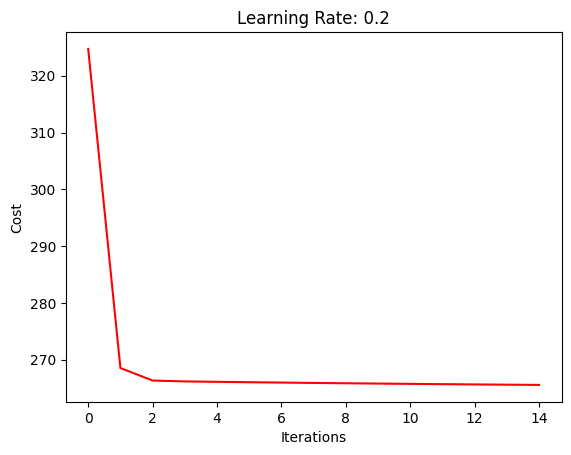

Learning Rate: 0.2
Final theta: [ 7.24849511 21.58553524]
Final cost: 265.53990083529055
Prediction for x=3.5: 82.79786845544079
Prediction for x=7.0: 158.3472418000576




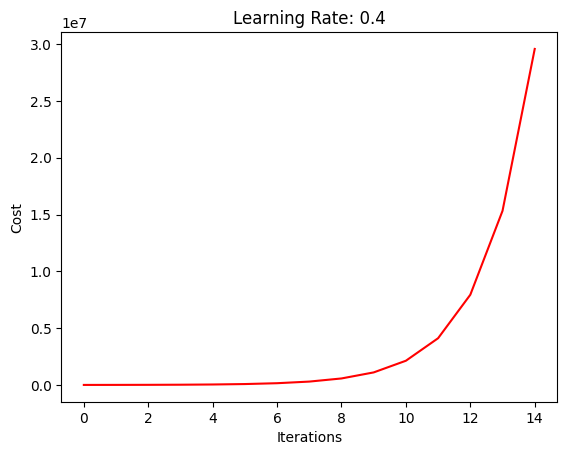

Learning Rate: 0.4
Final theta: [1224.77849436 2923.4999755 ]
Final cost: 29577650.358061485
Prediction for x=3.5: 11457.028408594788
Prediction for x=7.0: 21689.278322830076




In [8]:
results = []

for lr in learning_rates:
    theta = np.zeros(2)
    theta, cost_history = gradient_descent(x, y, theta, lr, iterations)

    # Plot the cost function over iterations
    plt.plot(range(iterations), cost_history, 'r')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title(f'Learning Rate: {lr}')
    plt.show()

    # Print final theta, final cost, and predictions
    final_cost = compute_cost(x, y, theta)
    prediction_3_5 = np.dot([1, 3.5], theta)
    prediction_7_0 = np.dot([1, 7.0], theta)

    results.append((lr, theta, final_cost, prediction_3_5, prediction_7_0))

    print(f"Learning Rate: {lr}")
    print("Final theta:", theta)
    print("Final cost:", final_cost)
    print("Prediction for x=3.5:", prediction_3_5)
    print("Prediction for x=7.0:", prediction_7_0)
    print("\n")


In [9]:
# Determine the optimal learning rate
optimal_result = min(results, key=lambda x: x[2])

print("Optimal Learning Rate:", optimal_result[0])
print("Optimal theta:", optimal_result[1])
print("Optimal final cost:", optimal_result[2])
print("Optimal prediction for x=3.5:", optimal_result[3])
print("Optimal prediction for x=7.0:", optimal_result[4])

Optimal Learning Rate: 0.2
Optimal theta: [ 7.24849511 21.58553524]
Optimal final cost: 265.53990083529055
Optimal prediction for x=3.5: 82.79786845544079
Optimal prediction for x=7.0: 158.3472418000576
